In [2]:
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import Net
from torchvision import transforms

sys.path.insert(0, '../..')
from load import load
from train import train, eval
from utils import plot_learningcurve, get_metrics
from dataset import psf_dataset, splitDataLoader, ToTensor, Normalize

In [3]:
model = Net()

# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model.to(device)

DataParallel(
  (module): Net(
    (conv1): Conv2d(2, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(40, 20, kernel_size=(1, 1), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=5120, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=20, bias=True)
  )
)

In [4]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [5]:
# Data set
data_dir = '../../dataset/'
dataset_size = 1000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

In [6]:
train(
      model, 
      dataset, 
      optimizer, 
      criterion,
      split = [0.9, 0.1],
      batch_size = 64,
      n_epoch = 50,
      random_seed = 42,
      model_dir = './',
      visdom = True  
     )

Training started on cuda:0
Visdom successfully connected to server
[1/50] Train loss: 22075.872266 
[1/50] Validation loss: 22677.982422 
[1/50] Time: 4.676627 s
------------------------------
[2/50] Train loss: 20155.664063 
[2/50] Validation loss: 14874.909180 
[2/50] Time: 1.950160 s
------------------------------
[3/50] Train loss: 13142.730990 
[3/50] Validation loss: 12664.677734 
[3/50] Time: 1.835779 s
------------------------------
[4/50] Train loss: 12048.158333 
[4/50] Validation loss: 11675.626953 
[4/50] Time: 1.867815 s
------------------------------
[5/50] Train loss: 11460.757812 
[5/50] Validation loss: 10980.772949 
[5/50] Time: 1.881732 s
------------------------------
[6/50] Train loss: 11026.953906 
[6/50] Validation loss: 10702.152832 
[6/50] Time: 1.849281 s
------------------------------
[7/50] Train loss: 10040.936654 
[7/50] Validation loss: 9050.355957 
[7/50] Time: 1.837311 s
------------------------------
[8/50] Train loss: 8594.532031 
[8/50] Validation lo

<Figure size 432x288 with 0 Axes>

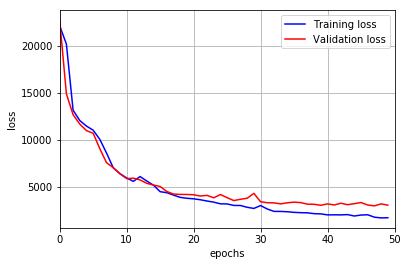

In [7]:
metrics = get_metrics()
plot_learningcurve(metrics)